# Question 1. Data Exploration
## [CM1] Data Cleaning and Normalization

Importing all necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Loading  Iris Dataset

In [2]:
df_iris = pd.read_csv("iris_dataset_missing.csv")

## Data Cleaning for Iris Data set

#### 1. Check for duplicate values

In [3]:
df_iris.duplicated().sum()

0

<b> There are no duplicate values in Iris Data. </b>

#### 2. Removing negative values and replacing with NAN 

In [4]:
(df_iris.iloc[:,0:-1]<0).sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     2
dtype: int64

In [5]:
df_iris[df_iris['petal_width']<0]  #negative values in petal_width column

,sepal_length,sepal_width,petal_length,petal_width,species
6,4.81174,3.037915,1.494268,-0.042428,Iris-setosa
67,4.86021,3.071128,1.487504,-0.072203,Iris-setosa


In [6]:
df_iris[df_iris.iloc[:,0:-1]<0] = np.NAN

<b> Thus all the negative values in petal_width column are replaced with NAN so that it will be processed later for further cleaning. </b>

#### 3. Checking Outliers
<b> The outliers are removed first so that the mean value is more accurate which is used to replace NAN values later in next step. To find the outliers we are plotting box and wisker plot and replacing it with min and max values of that function if not dropping the values. <b/>

<AxesSubplot:>

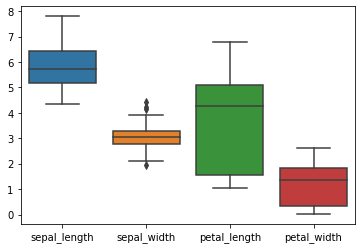

In [7]:
sns.boxplot(data=df_iris.iloc[:,0:-1])

<b> Outliers = Observations > Q3 + 1.5*IQR  or  < Q1 – 1.5*IQR </b>

In [8]:
temp = df_iris.describe() 
#We are extracting the inter quartile range from describe()
q3 = temp['sepal_width']['75%']
q1 = temp['sepal_width']['25%']
IQR = q3-q1
right_limit = q3+1.5*IQR
left_limit = q1-1.5*IQR
print("right limit is:",right_limit)
print("left limit is:",left_limit)

#printing outlier values
upper = df_iris['sepal_width']>right_limit
lower = df_iris['sepal_width']<left_limit
print(df_iris[upper | lower]) #all outliers

#replacing outlier values with upper limit or lower limit
df_iris['sepal_width'] = np.where(df_iris['sepal_width']>right_limit, right_limit, df_iris['sepal_width'])
df_iris['sepal_width'] = np.where(df_iris['sepal_width']<left_limit, left_limit, df_iris['sepal_width'])

right limit is: 4.072762818261982
left limit is: 1.9862426917999976
     sepal_length  sepal_width  petal_length  petal_width          species
30       5.673096     4.409565           NaN     0.370518      Iris-setosa
72       5.152435     4.144870      1.560718     0.143483      Iris-setosa
86       5.045108     1.946010      3.581591     0.891631  Iris-versicolor
102      5.548047     4.249211      1.453466     0.214527      Iris-setosa


<b> The sepal_width column is having 4 outliers. These ouliers are replaced by the nearest upper limit or lower limit successfully. We are not dropping them as they are very close to the upper limit and lower limit. </b>

#### 4. Data Cleaning by replacing with average mean

In [9]:
print("-------------Iris Data--------------")
print("Size of Iris data set:", df_iris.size)
print("Shape of Iris data set:",df_iris.shape)
print("Total NAN values in iris data are :",df_iris.isna().sum().sum(),"\n")
df_iris.describe()


-------------Iris Data--------------
Size of Iris data set: 525
Shape of Iris data set: (105, 5)
Total NAN values in iris data are : 14 



,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,101.000000,97.000000,103.000000
mean,5.858909,3.053686,3.812370,1.224117
std,0.861638,0.439155,1.793489,0.774748
min,4.344007,1.986243,1.033031,0.020731
25%,5.159145,2.768688,1.545136,0.341349
50%,5.736104,3.049459,4.276817,1.349398
75%,6.435413,3.290318,5.094427,1.827568
max,7.795561,4.072763,6.768611,2.603123


In [10]:
#using groupby to find categorical mean values
df_iris.groupby("species").mean()          

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,4.987384,3.366333,1.484517,0.246640
Iris-versicolor,5.948732,2.760597,4.283101,1.308528
Iris-virginica,6.640611,3.025507,5.654781,2.061326


In [11]:
#replacing na values with mean
df_iris['sepal_width'] = df_iris.groupby('species')['sepal_width'].apply(lambda x:x.fillna(x.mean()))
df_iris['petal_length'] = df_iris.groupby('species')['petal_length'].apply(lambda x:x.fillna(x.mean()))
df_iris['petal_width'] = df_iris.groupby('species')['petal_width'].apply(lambda x:x.fillna(x.mean()))

<b> We replaced the na values with the mean of respective colums so that we can replace na values with the approximate values without the loss of data. </b>

In [12]:
print(df_iris.isna().sum())
df_iris.to_csv("cleaned_data_iris.csv",index=False) #clean iris data saved to new csv file

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


# Normalization for Iris Data

## 1. Min-Max Normalization

In [13]:
Scaler = MinMaxScaler()
temp = df_iris.drop(["species"],axis=1)
MinMax_iris = Scaler.fit_transform(temp)
MinMax_df_iris = pd.DataFrame(MinMax_iris,columns=temp.columns)
MinMax_df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.203115,0.250158,0.346084,0.443075
1,0.574092,0.061940,0.611799,0.539391
2,0.264660,0.876129,0.076301,0.145066
3,0.675395,0.582529,0.828588,0.906924
4,0.362512,0.331616,0.530848,0.522204


## 2. Z-Score Normalization

In [14]:
#referred z_score formula from lecture notes
z_score_iris = (temp-temp.mean())/temp.std()
z_score_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.944525,-1.251332,-0.439418,-0.052090
1,0.541536,-2.157005,0.408884,0.267233
2,-0.697987,1.760718,-1.300709,-1.040094
3,0.947335,0.347969,1.100988,1.485733
4,-0.306013,-0.859374,0.150445,0.210250


[Text(0.5, 1.0, 'Z_score Normalized Data')]

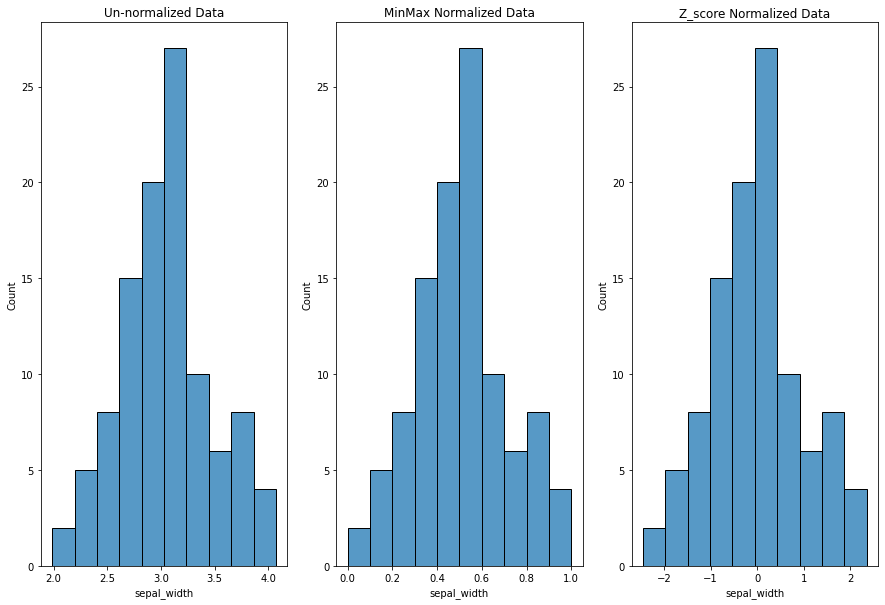

In [15]:
#Visualizing
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
sns.histplot(df_iris['sepal_width']).set(title='Un-normalized Data')
plt.subplot(1,3,2)
sns.histplot(MinMax_df_iris['sepal_width']).set(title='MinMax Normalized Data')
plt.subplot(1,3,3)
sns.histplot(z_score_iris['sepal_width']).set(title='Z_score Normalized Data')

Note: comparison of un-normalized vs normalized is given in the end of the document

In [16]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  105 non-null    float64
 1   sepal_width   105 non-null    float64
 2   petal_length  105 non-null    float64
 3   petal_width   105 non-null    float64
 4   species       105 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.2+ KB


# Loading Heart Dataset


In [17]:
df = pd.read_csv('heart_disease_missing.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.175904,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.082071,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.020827,0
3,51,1,2,99.934001,NaN,0,1.0,143.049207,1,1.195082,1.0,0,2.100312,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,2.831509,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  205 non-null    float64
 4   chol      202 non-null    float64
 5   fbs       212 non-null    int64  
 6   restecg   207 non-null    float64
 7   thalach   208 non-null    float64
 8   exang     212 non-null    int64  
 9   oldpeak   200 non-null    float64
 10  slope     210 non-null    float64
 11  ca        212 non-null    int64  
 12  thal      211 non-null    float64
 13  target    212 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 23.3 KB


### Data Cleaning

#### 1. Check for duplicate values

In [19]:
df.duplicated().sum()

0

<b> It seems very unlikely that two patients would have exactly the same values for all of these measures which suggests that this is a duplicate. In our case we don't have any duplicate value otherwise we would have dropped it. </b>

#### 2. Check for negative values

In [20]:
df[df<0].count()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak     38
slope        0
ca           0
thal         0
target       0
dtype: int64

In [21]:
df["oldpeak"][df["oldpeak"]<0].head(10)

2    -0.023723
5    -0.080278
18   -0.072567
21   -0.020171
25   -0.066296
27   -0.055898
39   -0.065718
40   -0.002749
41   -0.032577
51   -0.038007
Name: oldpeak, dtype: float64

ST depression or EST: Exercise Stress Test                                          
The results of an EST are usually reported as either negative, positive or inconclusive.                                       
<b>Negative</b>:A negative test result indicates a normal test which significantly decreases the likelihood of coronary artery disease.                                                                                                                       
<b> Therefore, negative values of oldpeak are required in our dataset and we will leave them as it is. </b>

#### 3. Checking outliers

<AxesSubplot:>

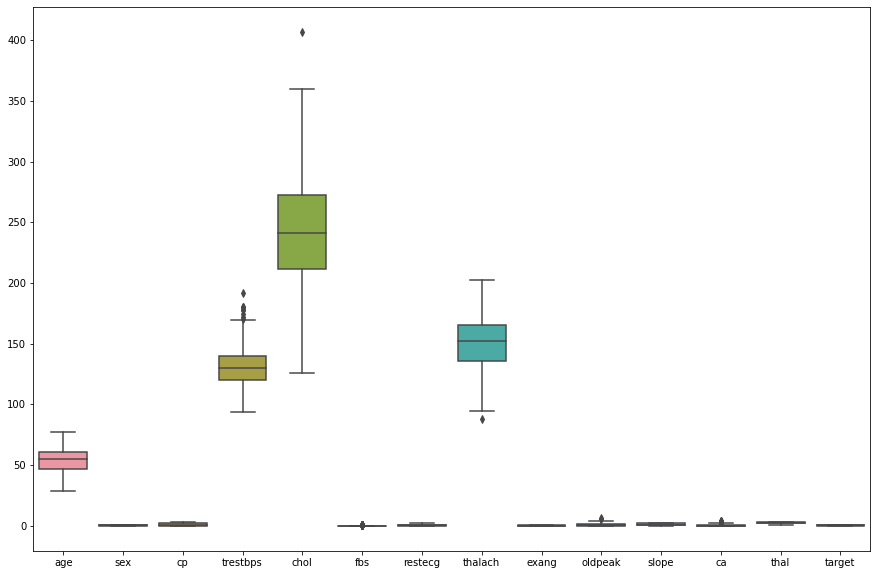

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

###### a. Removing outliers from "trestbps" column

<AxesSubplot:>

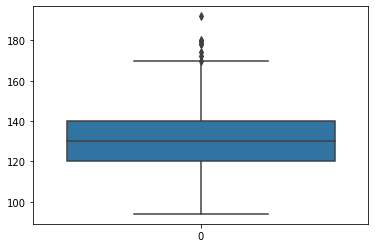

In [23]:
sns.boxplot(data=df["trestbps"])

In [24]:
t = df.describe()
#We are extracting the inter quartile range from describe()
q3=t['trestbps']['75%']
q1=t['trestbps']['25%']
print("q1:",q1)
print("q3:",q3)
IQR=q3-q1
print("IQR:",IQR)
right_limit=q3+2*IQR
left_limit=q1-2*IQR
print("right_limit:",right_limit)
print("left_limit:",left_limit)

#to print outliers
upper = df['trestbps']>right_limit
lower = df['trestbps']<left_limit
print(df[upper | lower]) #all outliers
print("mean:",df['trestbps'].mean())    

#finding the index of outliers and dropping them
index = df[upper|lower].index
df.drop(index, inplace=True)

q1: 119.96811391040684
q3: 139.96546982973814
IQR: 19.997355919331298
right_limit: 179.96018166840074
left_limit: 79.97340207174425
     age  sex  cp    trestbps        chol  fbs  restecg     thalach  exang  \
87    55    0   0  179.976042  327.104626    0      2.0  116.888054      1   
100   54    1   1  192.020200  283.024208    0      0.0  195.118927      0   
198   64    0   0  180.118809  324.953093    0      1.0  153.862187      1   

      oldpeak  slope  ca      thal  target  
87   3.387354    1.0   0  1.863855       0  
100 -0.113872    2.0   1  2.829133       0  
198  0.001762    2.0   0  1.888972       1  
mean: 131.7846100720452


<b> Trestbps is the resting blood pressure of the patient therefore we cannot replace an outlier in such sensitive data. Therefore, we dropped the outlier values.</b>

###### b. Removing outliers from "thalach" column

<AxesSubplot:>

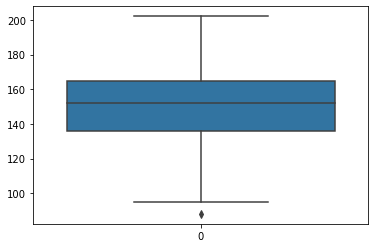

In [25]:
sns.boxplot(data=df["thalach"])

In [26]:
q3=t['thalach']['75%']
q1=t['thalach']['25%']
print("q1:",q1)
print("q3:",q3)
IQR=q3-q1
print("IQR:",IQR)
right_limit=q3+1.5*IQR
left_limit=q1-1.5*IQR
print("right_limit:",right_limit)
print("left_limit:",left_limit)

upper = df['thalach']>right_limit
lower = df['thalach']<left_limit
print(df[upper | lower]) #all outliers
print("mean:",df['thalach'].mean())    

df['thalach']=np.where(df['thalach']>right_limit, right_limit, df['thalach']) #When True, yield x, otherwise yield y()
df['thalach']=np.where(df['thalach']<left_limit, left_limit, df['thalach'])


#outlier values of thalach are very near to the lower_limit so instead of dropping, We have set them to near boundary values.

q1: 135.9468084271066
q3: 165.2600920591503
IQR: 29.31328363204372
right_limit: 209.2300175072159
left_limit: 91.97688297904101
    age  sex  cp    trestbps        chol  fbs  restecg    thalach  exang  \
35   57    1   0  152.010765  274.011716    0      1.0  88.032613      1   

     oldpeak  slope  ca      thal  target  
35  1.211774    1.0   1  2.944476       0  
mean: 149.56541601015942


<b> The outlier value for thalach is not dropped because its very near to the lower limit. Thalach represents Maximum heart rate achieved during thalium stress test and so slightly improving it won't harm the data. </b>

##### c. Removing outliers from "oldpeak" column

<AxesSubplot:>

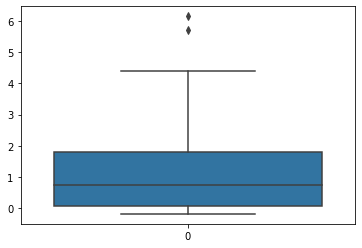

In [27]:
sns.boxplot(data=df["oldpeak"])

In [28]:
q3=t['oldpeak']['75%']
q1=t['oldpeak']['25%']
print("q1:",q1)
print("q3:",q3)
IQR=q3-q1
print("IQR:",IQR)
right_limit=q3+1.5*IQR
left_limit=q1-1.5*IQR
print("right_limit:",right_limit)
print("left_limit:",left_limit)

upper = df['oldpeak']>right_limit
lower = df['oldpeak']<left_limit
print("Outlier Values:",df['oldpeak'][upper | lower]) #all outliers
print("mean:",df['oldpeak'].mean())    

#clear outliers, will drop them
index = df[upper|lower].index
df.drop(index, inplace=True)

q1: 0.0507784478366375
q3: 1.8167327667586506
IQR: 1.765954318922013
right_limit: 4.46566424514167
left_limit: -2.5981530305463822
Outlier Values: 130    5.706782
171    6.157114
Name: oldpeak, dtype: float64
mean: 1.1134310577823512


<b> The 2 outlier values for oldpeak are dropped because they are way too far from upper limit and can be considered clear outliers. </b>

##### d. Removing outliers from "chol" column


<AxesSubplot:>

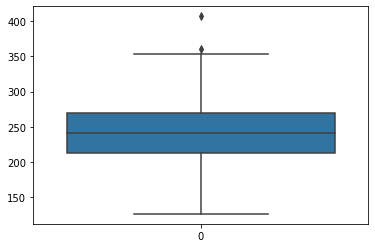

In [29]:
sns.boxplot(data=df["chol"])

In [30]:
q3=t['chol']['75%']
q1=t['chol']['25%']
print("q1:",q1)
print("q3:",q3)
IQR=q3-q1
print("IQR:",IQR)
right_limit=q3+1.5*IQR
left_limit=q1-1.5*IQR
print("right_limit:",right_limit)
print("left_limit:",left_limit)

upper = df['chol']>right_limit
lower = df['chol']<left_limit
print(df[upper | lower]) #all outliers
print("mean:",df['chol'].mean())    

#Dropping outliers
index = df[upper|lower].index
df.drop(index, inplace=True)

q1: 211.96959445998073
q3: 272.48422198835755
IQR: 60.51462752837682
right_limit: 363.2561632809228
left_limit: 121.1976531674155
     age  sex  cp    trestbps        chol  fbs  restecg     thalach  exang  \
186   63    0   0  149.930435  406.932689    0      0.0  153.883907      0   

      oldpeak  slope  ca      thal  target  
186  3.988717    1.0   3  3.246921       0  
mean: 243.6473447603769


<b> Chol = 406.93 on index=186 is a clear outliear as the Serum cholestoral level ranges upto 200mg/dl so we'll drop it. </b>

#### 4. Data Cleaning by dropping data

##### checking column 'ca

<AxesSubplot:>

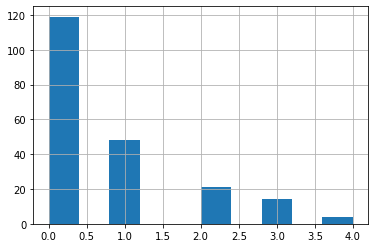

In [31]:
df.ca.hist()

<b> As we can see that we need to remove the ca values coming as 4 as this category is not defined. </b>

In [32]:
index = df[df.ca > 3].index
print(index)

df.drop(index, inplace=True)

Int64Index([55, 82, 103, 128], dtype='int64')


In [33]:
df = df.dropna()

<b> Dropped all the na values in the heart dataset as its not appropriate to change the data using average mean as its health data and should not be mendled with. </b>

In [34]:
print(df.isna().sum())
print(df.describe())
df.to_csv("heart_disease_cleaned.csv", index=False) #clean Heart data saved to new csv file

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
              age         sex          cp    trestbps        chol         fbs  \
count  164.000000  164.000000  164.000000  164.000000  164.000000  164.000000   
mean    54.786585    0.701220    0.963415  131.512766  245.644342    0.140244   
std      9.258235    0.459125    1.020587   17.409650   44.065104    0.348303   
min     29.000000    0.000000    0.000000   93.944184  126.085811    0.000000   
25%     47.750000    0.000000    0.000000  119.987220  213.761139    0.000000   
50%     56.000000    1.000000    1.000000  129.965463  242.960083    0.000000   
75%     61.250000    1.000000    2.000000  140.047417  273.874325    0.000000   
max     77.000000    1.000000    3.000000  179.926197  359.930615    1.000000   

          restecg     thalach       exang     oldpeak       s

# Normalization for Heart Data

## 1. Min Max Normalization for Heart Disease Dataset

In [35]:
names = df[['target','sex','cp','restecg','fbs','exang','slope','ca']]
#referred min-max formula from lecture notes
normalised_df = (df-df.min()) / (df.max()-df.min())
for i in normalised_df:
    if i in names:
        normalised_df[i]=df[i]
normalised_df.to_csv("minmax_cleaned_heart.csv",index=False)

## 2. Z score Normalization for Heart Disease Dataset

In [36]:
z_score_heart = (df-df.mean())/df.std()
#referred z-score formula from lecture notes
for i in z_score_heart:
    if i in names:
        z_score_heart[i]=df[i]
z_score_heart.to_csv("zscore_cleaned_heart.csv",index=False)

[Text(0.5, 1.0, 'Z-Score Normalised Data')]

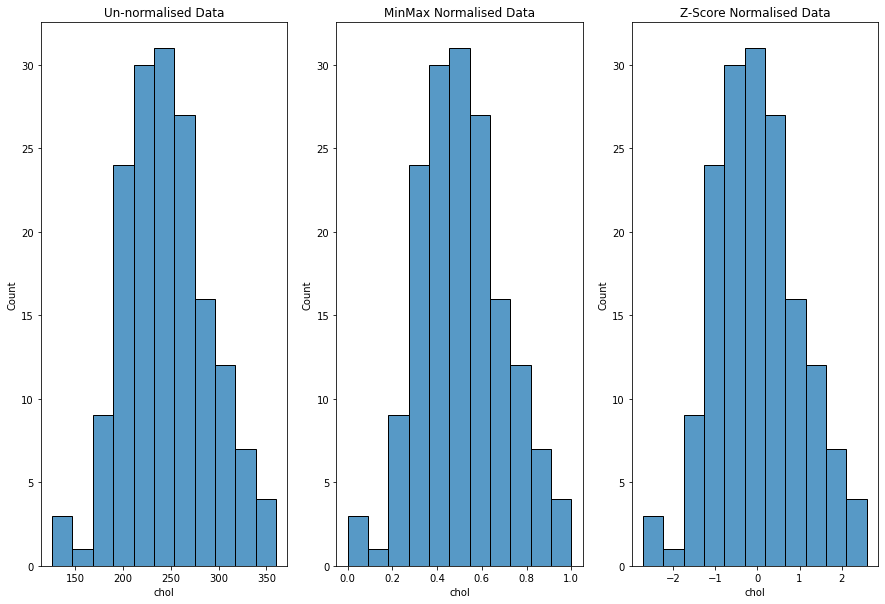

In [37]:
#Vizualising
plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
sns.histplot(df['chol']).set(title = 'Un-normalised Data')
plt.subplot(1,3,2)
sns.histplot(normalised_df['chol']).set(title = 'MinMax Normalised Data')
plt.subplot(1,3,3)
sns.histplot(z_score_heart['chol']).set(title = 'Z-Score Normalised Data')

# Un-normalized vs Normalized Data comparison

<b> The un-normalised data is having different units for different columns which might produce bias while computing. To reduce this, dataset is normalised.                                                                                                   
MIn-Max normalization ranges between [0-1] but a presence of outlier might affect the distribution/values. Thus, it is highly recommended to remove outliers before performing min-max normalisation.                                                        
In z-score normalisation, the features are scaled such that they have properties similar to normal distribution where mean is zero and standard deviation is one. From the above graphs its quiet evident that there is no change in shape but only change in values. </b>